In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as py
import pandas_profiling as pp
import sweetviz
import math

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_2792\129599390.py:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


We have imported the necessary packages to do the analysis

Next we get the dataset from the local dataset

In [2]:
df=pd.read_csv("zomato_dataset.csv")

first 5 rows of the dataset

In [3]:
df.head()

Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
0      Doner King            3.9              4.2            39   
1      Doner King            3.9              4.2            39   
2      Doner King            3.9              4.2            39   
3      Doner King            3.9              4.2            39   
4      Doner King            3.9              4.2            39   

   Delivery Votes   Cuisine  Place Name        City                 Item Name  \
0               0  Fast Food   Malakpet   Hyderabad       Platter Kebab Combo   
1               0  Fast Food   Malakpet   Hyderabad   Chicken Rumali Shawarma   
2               0  Fast Food   Malakpet   Hyderabad    Chicken Tandoori Salad   
3               0  Fast Food   Malakpet   Hyderabad         Chicken BBQ Salad   
4               0  Fast Food   Malakpet   Hyderabad  Special Doner Wrap Combo   

  Best Seller  Votes  Prices  
0  BESTSELLER     84   249.0  
1  BESTSELLER     45   129.0  
2         NaN     39   189.0  
3  BESTSELLER     43   189.0  
4    MUST TRY     31   205.0

dataset shape

In [4]:
df.shape

(123657, 12)

dataset info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123657 entries, 0 to 123656
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Restaurant Name  123657 non-null  object 
 1   Dining Rating    91421 non-null   float64
 2   Delivery Rating  122377 non-null  float64
 3   Dining Votes     123657 non-null  int64  
 4   Delivery Votes   123657 non-null  int64  
 5   Cuisine          123657 non-null  object 
 6   Place Name       123657 non-null  object 
 7   City             123657 non-null  object 
 8   Item Name        123657 non-null  object 
 9   Best Seller      27942 non-null   object 
 10  Votes            123657 non-null  int64  
 11  Prices           123657 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 11.3+ MB


In [6]:
def sh(col):
    df[col]=df[col].str.strip()

In [7]:
sh("Restaurant Name")
sh("Cuisine ")
sh("Place Name")
sh("City")
sh("Item Name")
sh("Best Seller")

## Next we do imputation in the datset

In [8]:
df.isnull().sum()

Restaurant Name        0
Dining Rating      32236
Delivery Rating     1280
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

we analyze the skewness of the Dining rate so that we can decide whether we can use median or mean to fill the null values

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_2792\276008510.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Dining Rating"])


<Axes: xlabel='Dining Rating', ylabel='Density'>

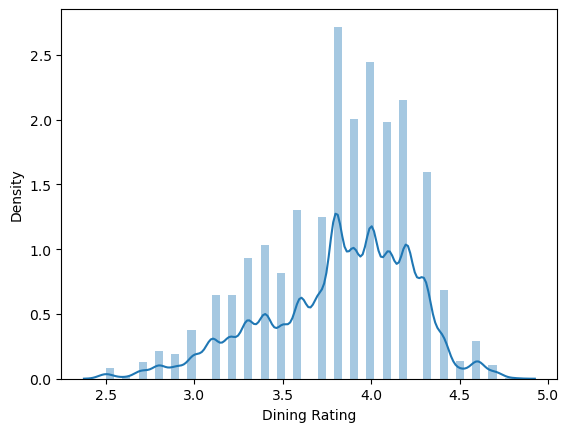

In [9]:
sns.distplot(df["Dining Rating"])

pearson skewness to check the skewness

In [10]:
def skewvalid(col):
    #print(col.head())
    m1=col.median()
    m2=col.mean()
    m3=col.std()
    return 3*((m2-m1)/m3)

In [11]:
p1=skewvalid(df["Dining Rating"])
p1

-0.5706187163003151

the skweness is mediocre so we use mean.

In [12]:
r=df["Dining Rating"].mean()
round(r,1)

3.8

In [13]:
df["Dining Rating"].fillna(round(r,1),inplace=True)

In [14]:
df.isnull().sum()

Restaurant Name        0
Dining Rating          0
Delivery Rating     1280
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

No we do the same for Delivery rating

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_2792\3216823001.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Delivery Rating"])


<Axes: xlabel='Delivery Rating', ylabel='Density'>

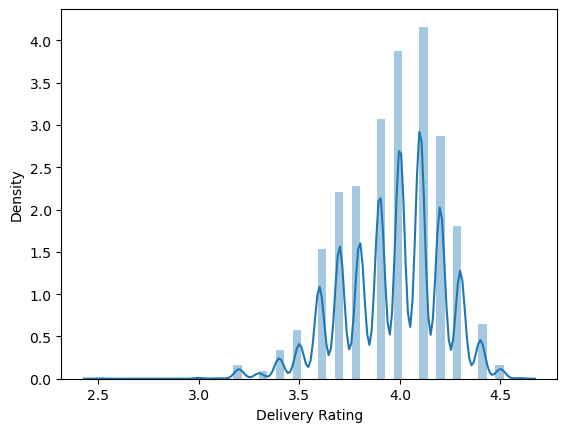

In [15]:
sns.distplot(df["Delivery Rating"])

In [16]:
p2=skewvalid(df["Delivery Rating"])
p2

-0.4491543119889596

In [17]:
r2=df["Delivery Rating"].mean()
df["Delivery Rating"].fillna(round(r2,1),inplace=True)

In [18]:
df.isnull().sum()

Restaurant Name        0
Dining Rating          0
Delivery Rating        0
Dining Votes           0
Delivery Votes         0
Cuisine                0
Place Name             0
City                   0
Item Name              0
Best Seller        95715
Votes                  0
Prices                 0
dtype: int64

The columns Dining rating and Delivery rating null values has been filled but now I have Best seller column which has null 
values covering 75 % of the column so I can drop the column but instead I'm filling the null values as "Regular order" in the 
datset 

In [19]:
df["Best Seller"].value_counts()

BESTSELLER                  16992
MUST TRY                     4151
Not eligible for coupons     2440
CHEF'S SPECIAL               1822
SPICY                        1254
Not on Pro                    657
NEW                           455
SEASONAL                       91
Eggless available              34
VEGAN                          26
GLUTEN FREE                     9
FODMAP FRIENDLY                 9
DAIRY FREE                      2
Name: Best Seller, dtype: int64

In [20]:
df["Special mentions"]=df["Best Seller"]

In [21]:
df=df.drop("Best Seller",axis=1)

In [22]:
df["Special mentions"]=df["Special mentions"].fillna("Regular")

In [23]:
df.isnull().sum()

Restaurant Name     0
Dining Rating       0
Delivery Rating     0
Dining Votes        0
Delivery Votes      0
Cuisine             0
Place Name          0
City                0
Item Name           0
Votes               0
Prices              0
Special mentions    0
dtype: int64

# Visualizations

## Univariate analysis

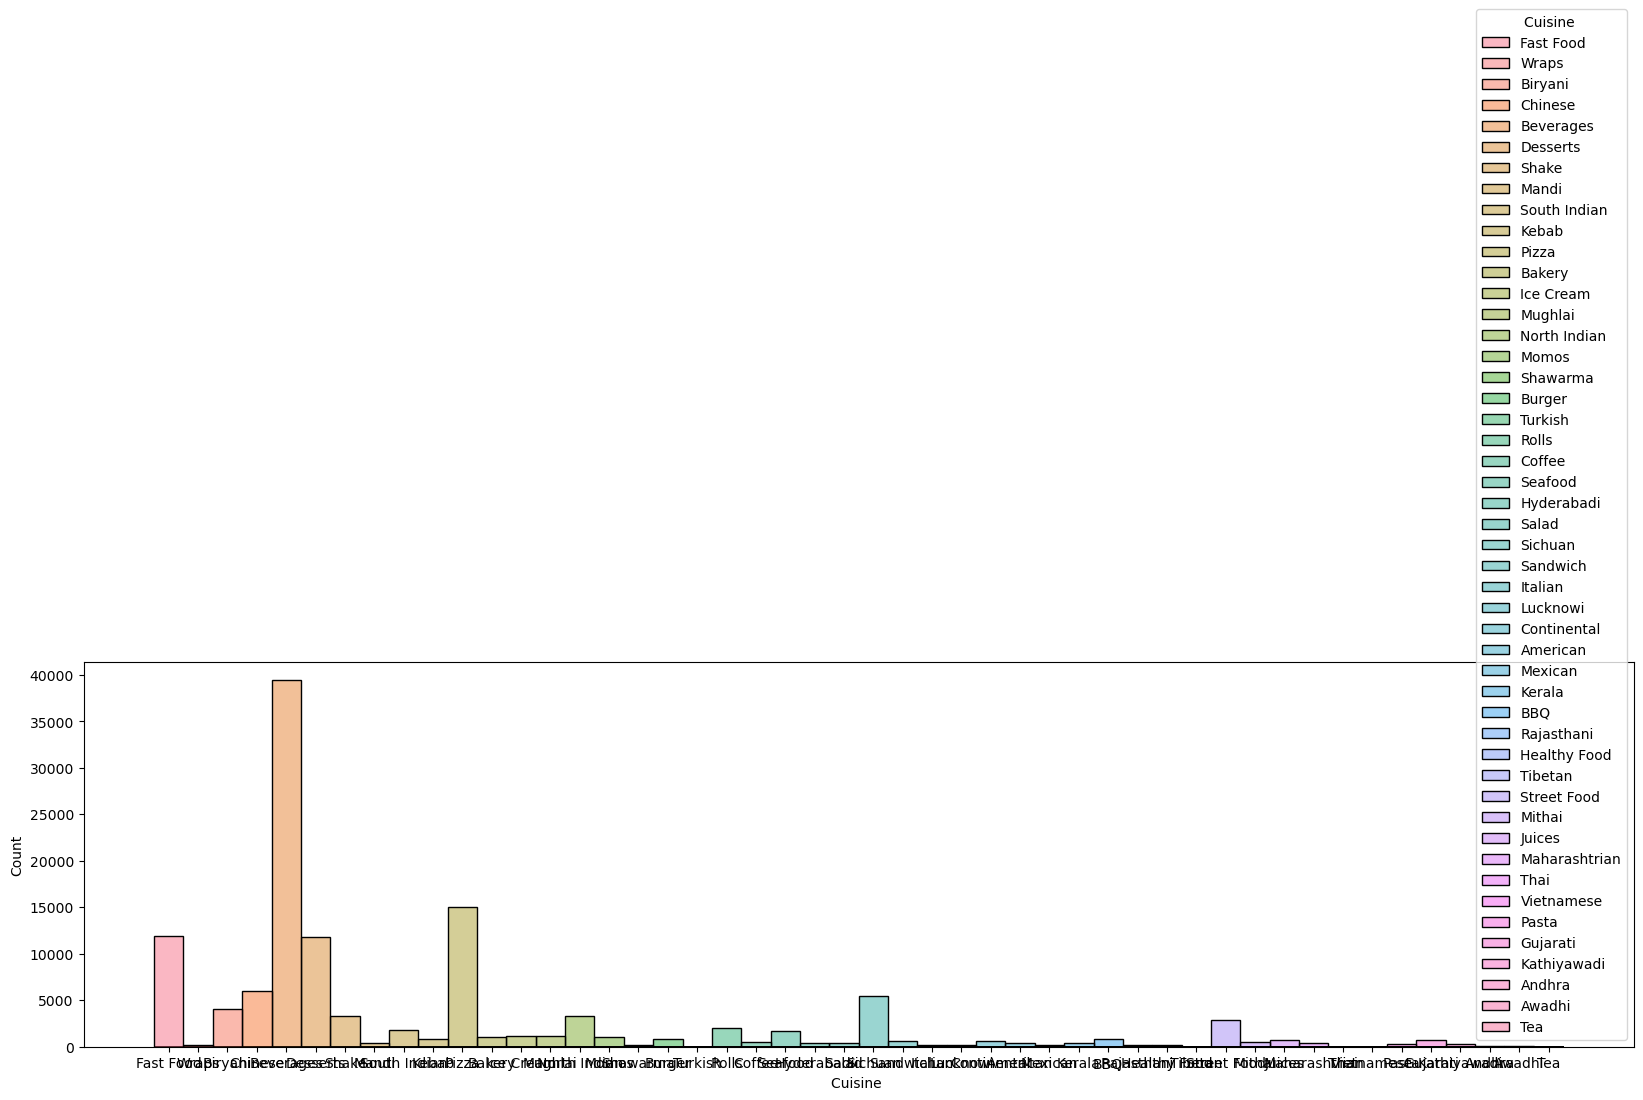

In [24]:
plt.figure(figsize=(20,5))
sns.histplot(data=df,x="Cuisine ",hue="Cuisine ")
plt.show()

the sales of beverages is more compared to other dishes

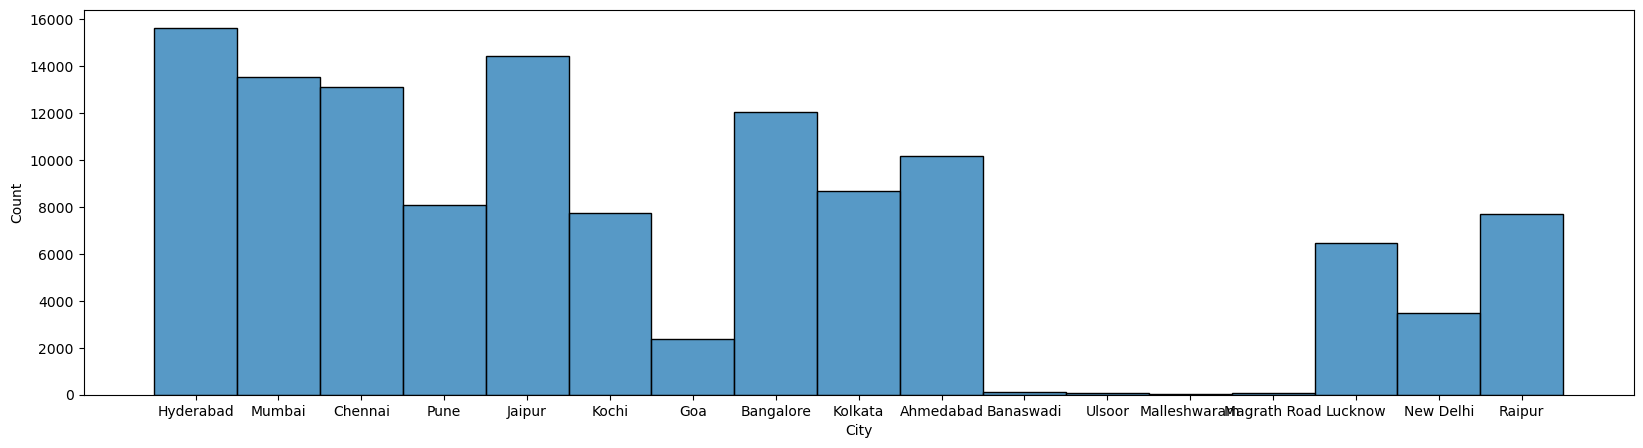

In [25]:
plt.figure(figsize=(20,5))
sns.histplot(data=df,x="City")
plt.show()

Hyderbad, chennai, mumbai, pune, jaipur, Kochi, Banglore, kolkata, Ahmedabad has more orders

<Axes: xlabel='Special mentions', ylabel='Count'>

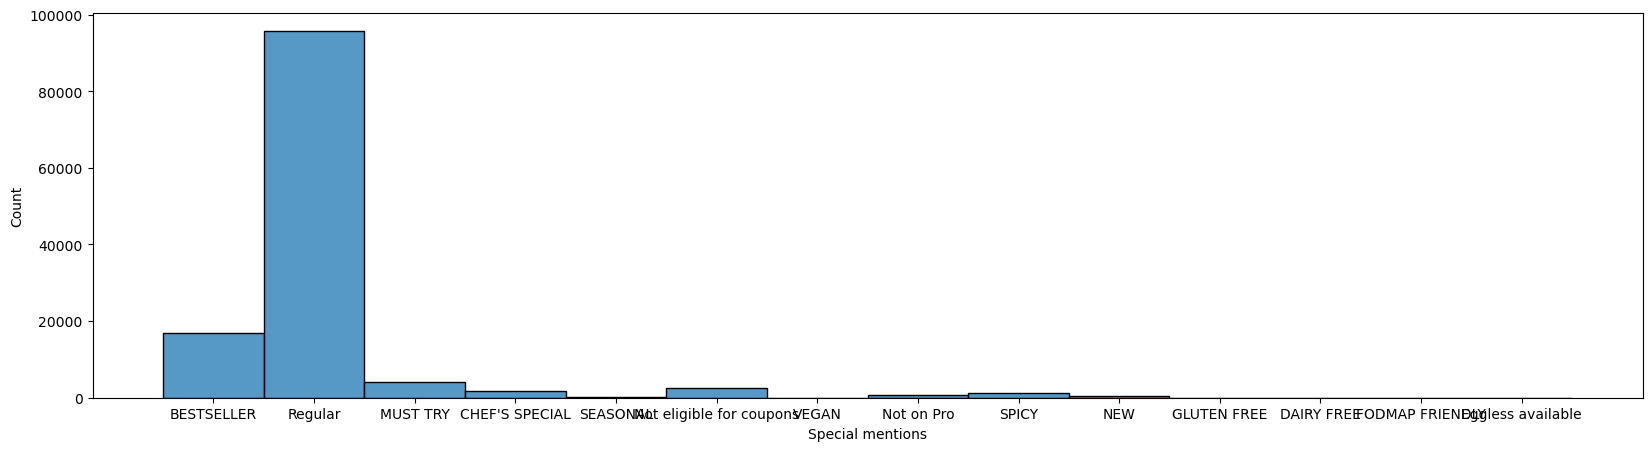

In [26]:
plt.figure(figsize=(20,5))

sns.histplot(df["Special mentions"])

city wise analysis

In [27]:
df_hyderabad=df[df["City"]=="Hyderabad"]

In [28]:
df_hyderabad.head()

Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
0      Doner King            3.9              4.2            39   
1      Doner King            3.9              4.2            39   
2      Doner King            3.9              4.2            39   
3      Doner King            3.9              4.2            39   
4      Doner King            3.9              4.2            39   

   Delivery Votes   Cuisine  Place Name       City                 Item Name  \
0               0  Fast Food   Malakpet  Hyderabad       Platter Kebab Combo   
1               0  Fast Food   Malakpet  Hyderabad   Chicken Rumali Shawarma   
2               0  Fast Food   Malakpet  Hyderabad    Chicken Tandoori Salad   
3               0  Fast Food   Malakpet  Hyderabad         Chicken BBQ Salad   
4               0  Fast Food   Malakpet  Hyderabad  Special Doner Wrap Combo   

   Votes  Prices Special mentions  
0     84   249.0       BESTSELLER  
1     45   129.0       BESTSELLER  
2     39   189.0          Regular  
3     43   189.0       BESTSELLER  
4     31   205.0         MUST TRY

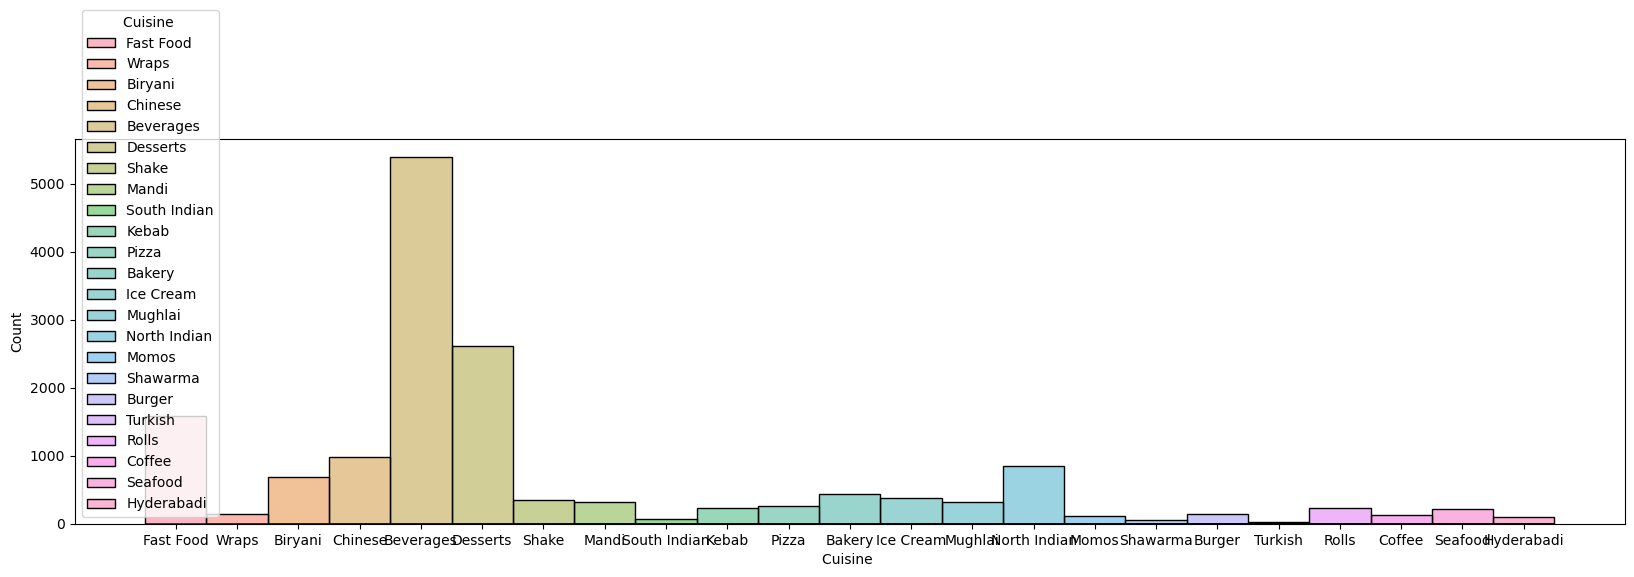

In [29]:
plt.figure(figsize=(20,5))
sns.histplot(data=df_hyderabad,x="Cuisine ",hue="Cuisine ")
plt.show()

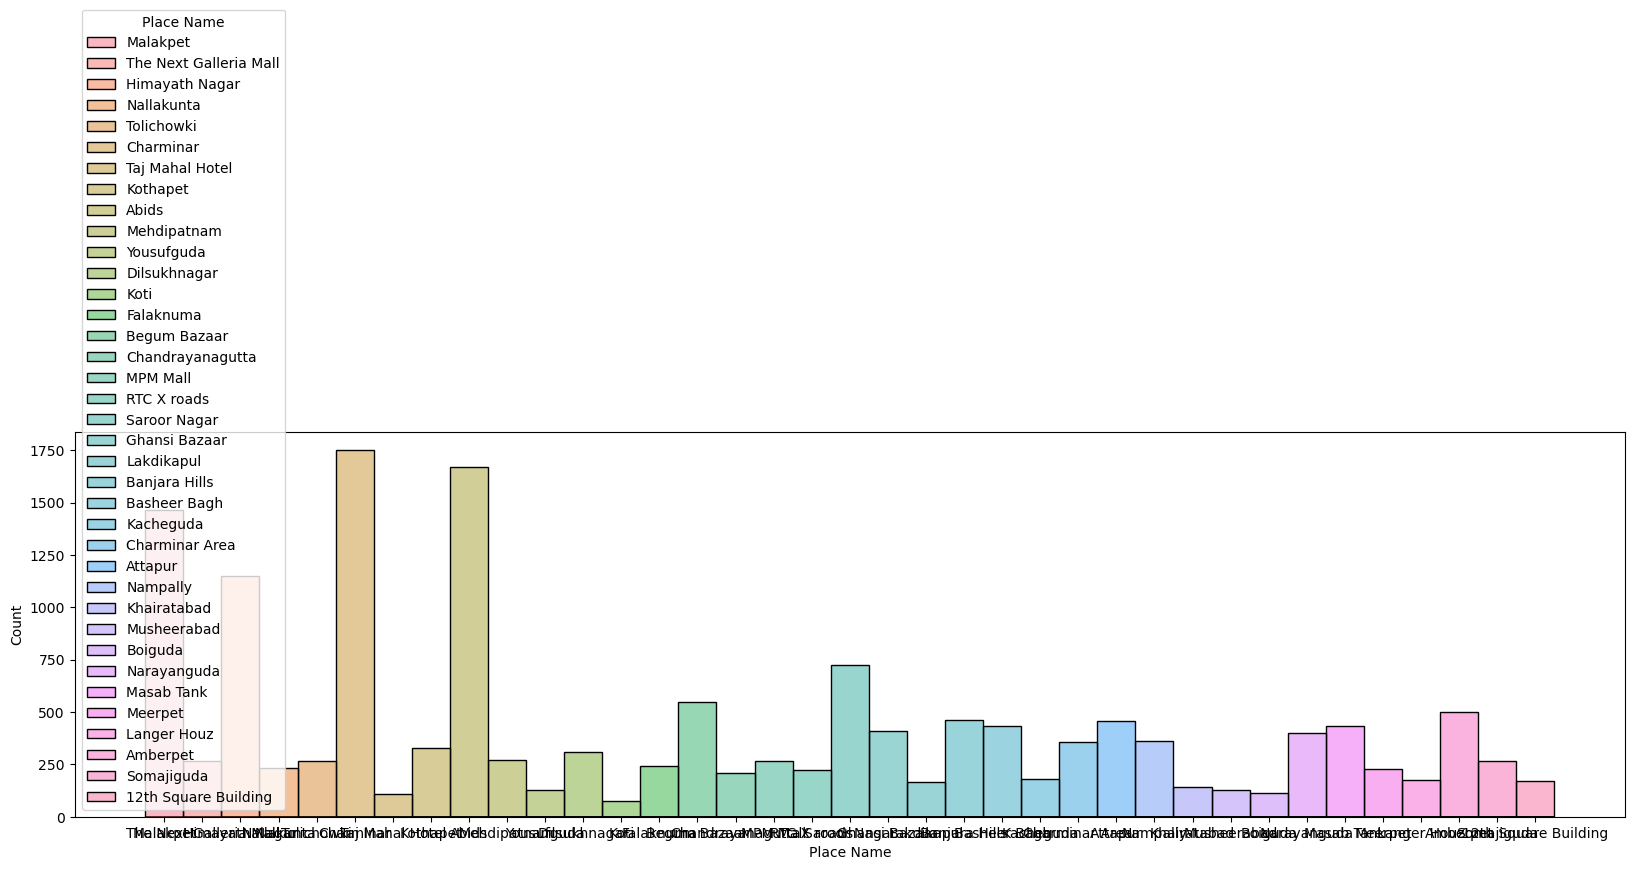

In [30]:
plt.figure(figsize=(20,5))
sns.histplot(data=df_hyderabad,x="Place Name",hue="Place Name")
plt.show()

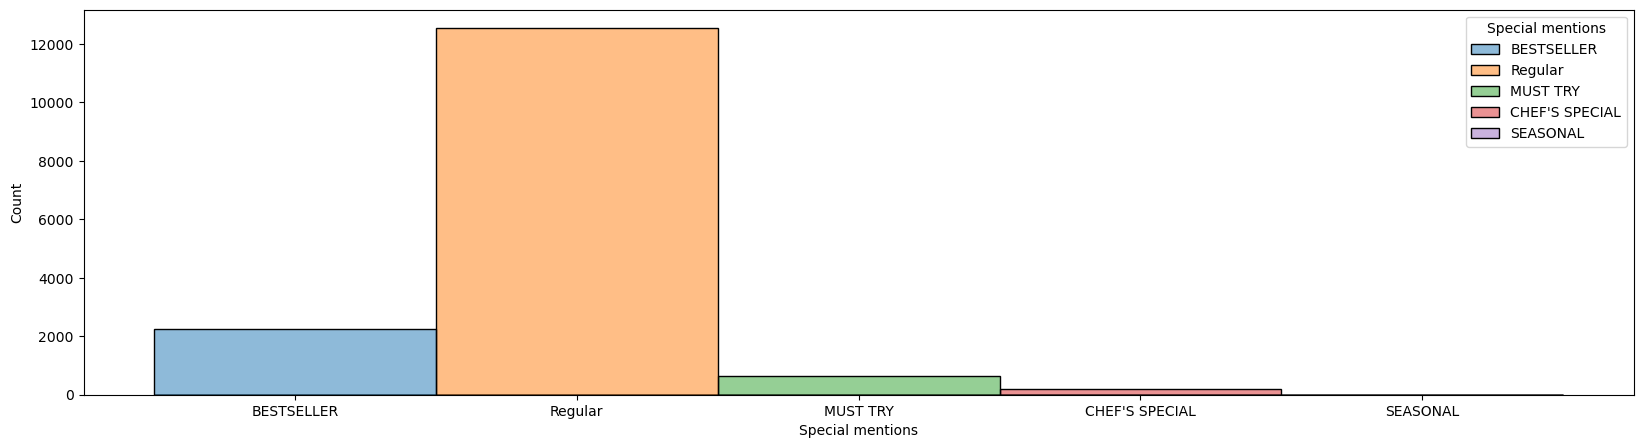

In [31]:
plt.figure(figsize=(20,5))
sns.histplot(data=df_hyderabad,x="Special mentions",hue="Special mentions")
plt.show()

In [32]:
df_chennai=df[df["City"]=="Chennai"]

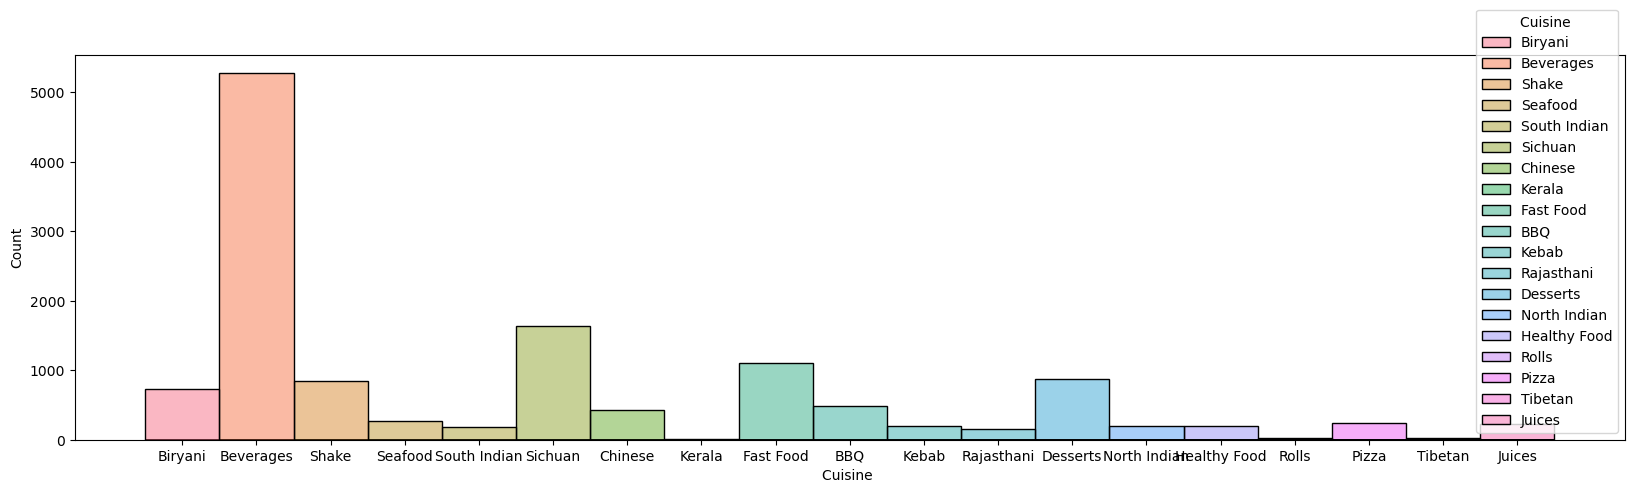

In [33]:
plt.figure(figsize=(20,5))
sns.histplot(data=df_chennai,x="Cuisine ",hue="Cuisine ")
plt.show()

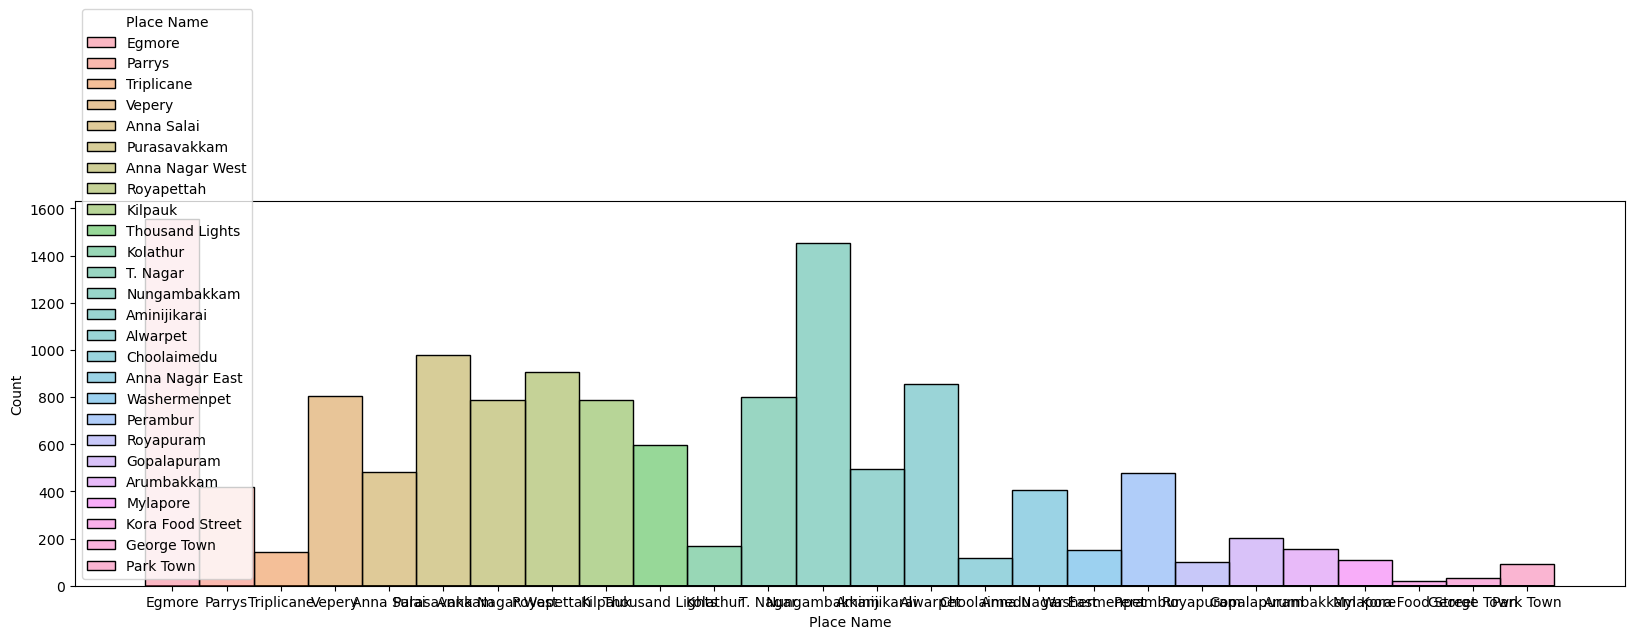

In [34]:
plt.figure(figsize=(20,5))
sns.histplot(data=df_chennai,x="Place Name",hue="Place Name")
plt.show()

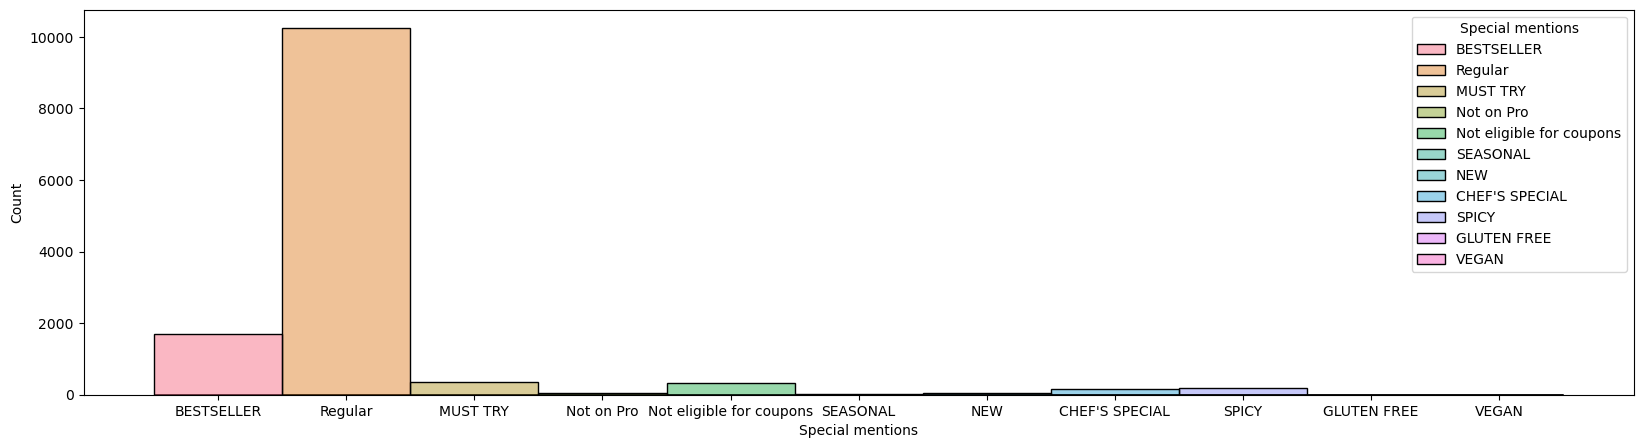

In [35]:
plt.figure(figsize=(20,5))
sns.histplot(data=df_chennai,x="Special mentions",hue="Special mentions")
plt.show()

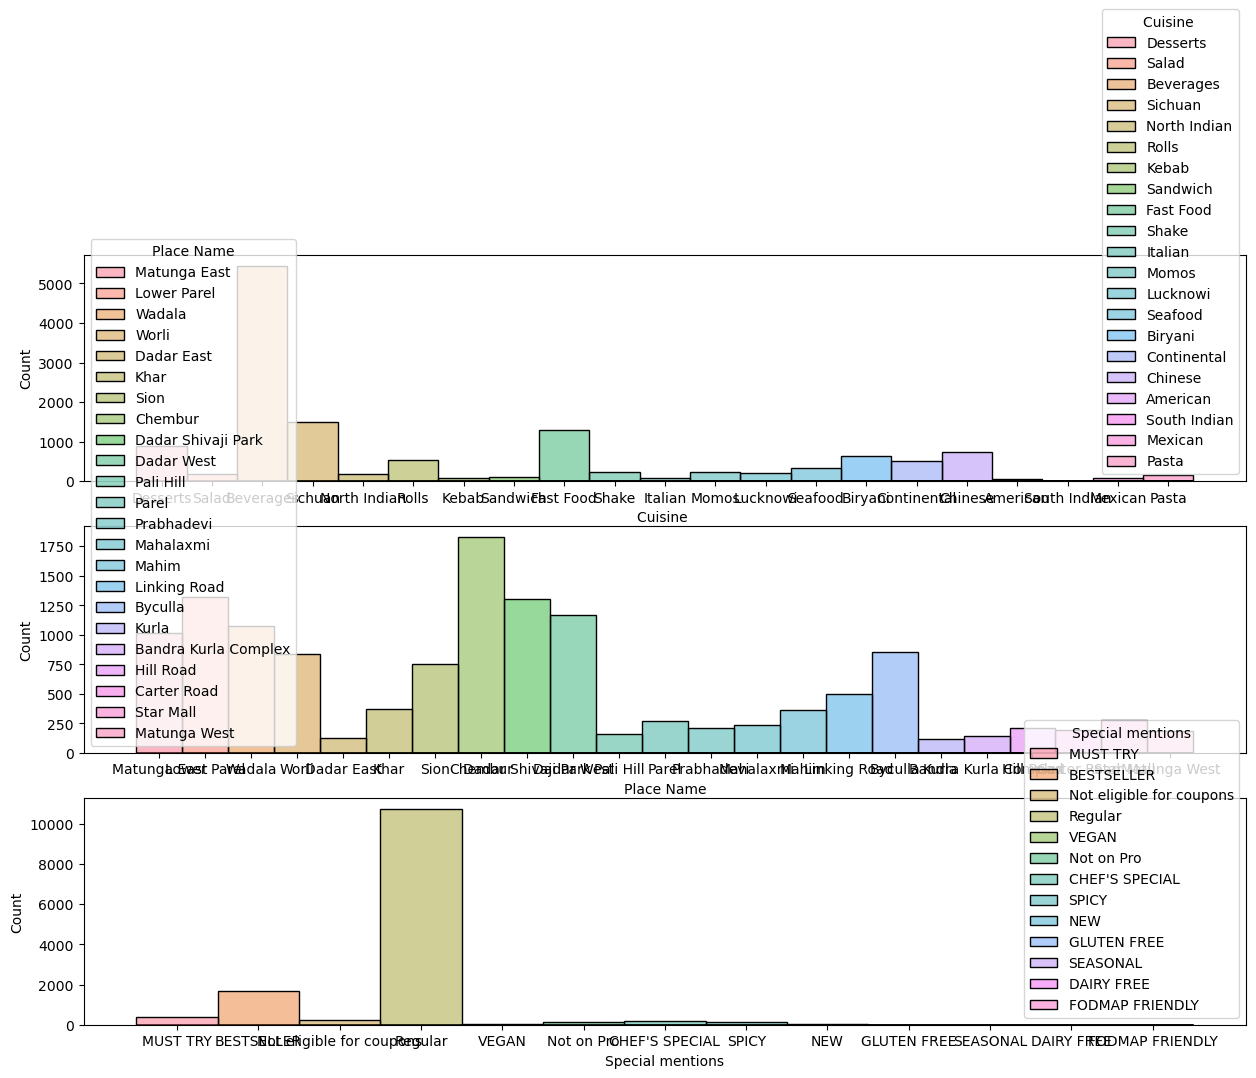

In [36]:
df_mumbai=df[df["City"]=="Mumbai"]
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
sns.histplot(data=df_mumbai,x="Cuisine ",hue="Cuisine ")
plt.subplot(3,1,2)
sns.histplot(data=df_mumbai,x="Place Name",hue="Place Name")
plt.subplot(3,1,3)
sns.histplot(data=df_mumbai,x="Special mentions",hue="Special mentions")
plt.show()

## Bivariate analysis

In [37]:
def sct(col,i):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,i)
    sns.scatterplot(data=df,x=col,y="Prices")
    plt.show()

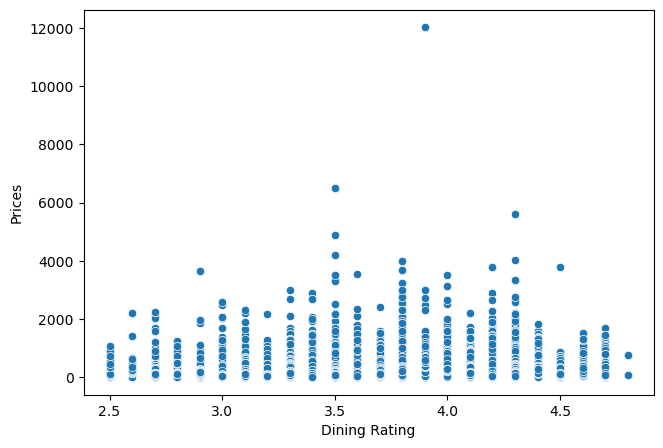

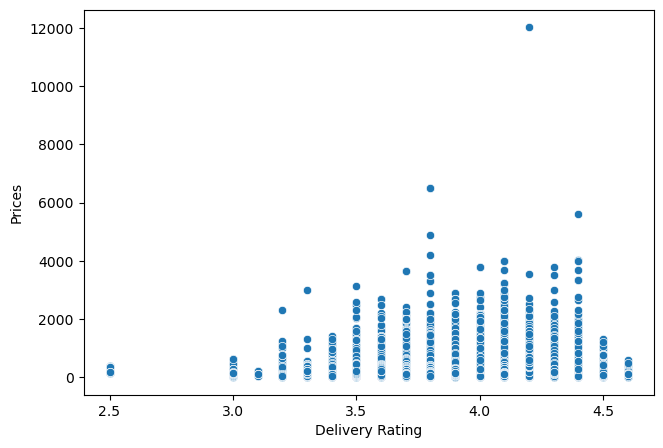

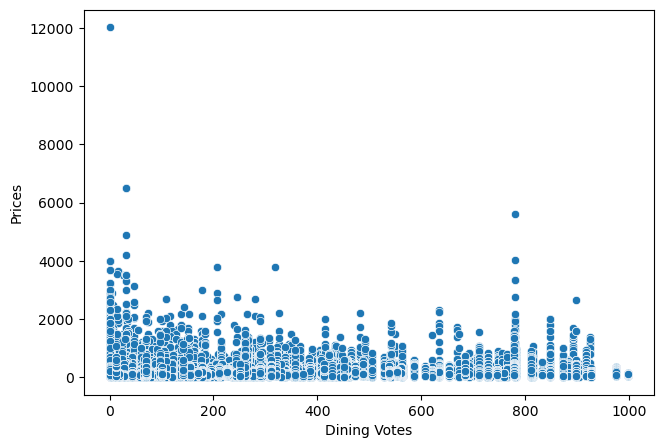

In [38]:
sct("Dining Rating",1)
sct("Delivery Rating",2)
sct("Dining Votes",3)

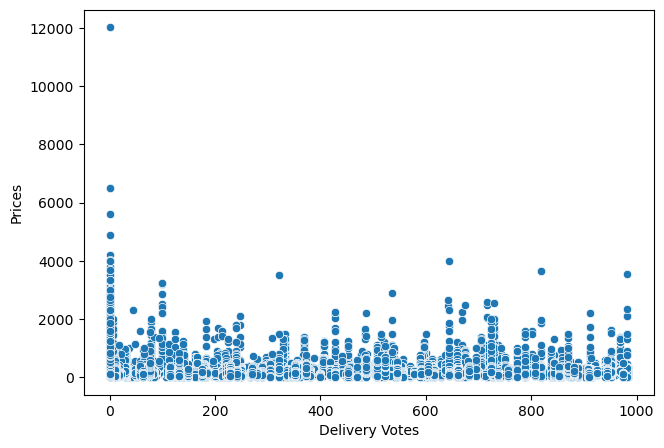

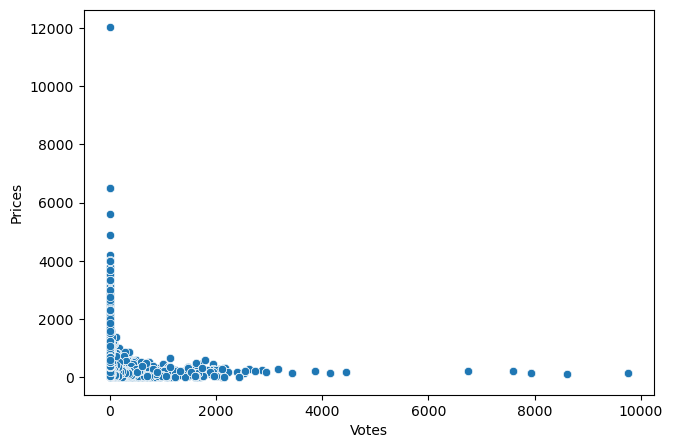

In [39]:
sct("Delivery Votes",1)
sct("Votes",2)

In the above column we infer that the colum votes is unncessary as items with zero votes sold more, this gives wrong 
interpretation.

In [40]:
df=df.drop("Votes",axis=1)

In [41]:
df.head()

Restaurant Name  Dining Rating  Delivery Rating  Dining Votes  \
0      Doner King            3.9              4.2            39   
1      Doner King            3.9              4.2            39   
2      Doner King            3.9              4.2            39   
3      Doner King            3.9              4.2            39   
4      Doner King            3.9              4.2            39   

   Delivery Votes   Cuisine  Place Name       City                 Item Name  \
0               0  Fast Food   Malakpet  Hyderabad       Platter Kebab Combo   
1               0  Fast Food   Malakpet  Hyderabad   Chicken Rumali Shawarma   
2               0  Fast Food   Malakpet  Hyderabad    Chicken Tandoori Salad   
3               0  Fast Food   Malakpet  Hyderabad         Chicken BBQ Salad   
4               0  Fast Food   Malakpet  Hyderabad  Special Doner Wrap Combo   

   Prices Special mentions  
0   249.0       BESTSELLER  
1   129.0       BESTSELLER  
2   189.0          Regular  
3   189.0       BESTSELLER  
4   205.0         MUST TRY

In [42]:
 corr=df.corr()

C:\Users\SURIYA\AppData\Local\Temp\ipykernel_2792\2572779251.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

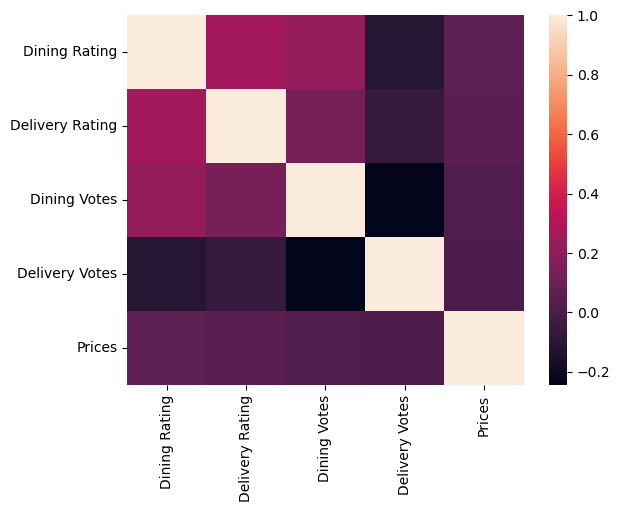

In [43]:
sns.heatmap(corr)

## multivariate analysis

In [44]:
def scat(col,i):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,i)
    sns.scatterplot(data=df,x=col,y="Prices",hue="City")
    plt.show()

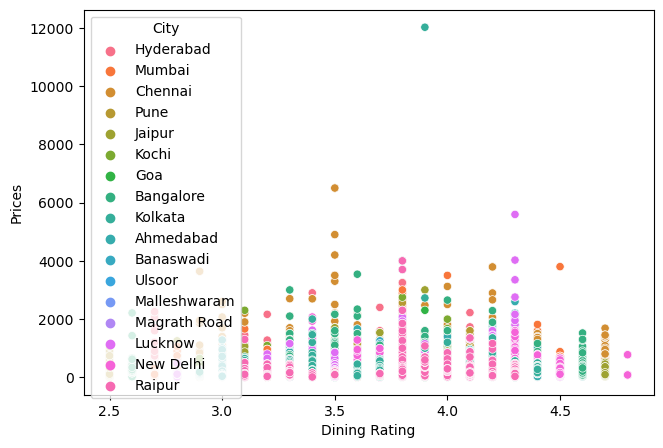

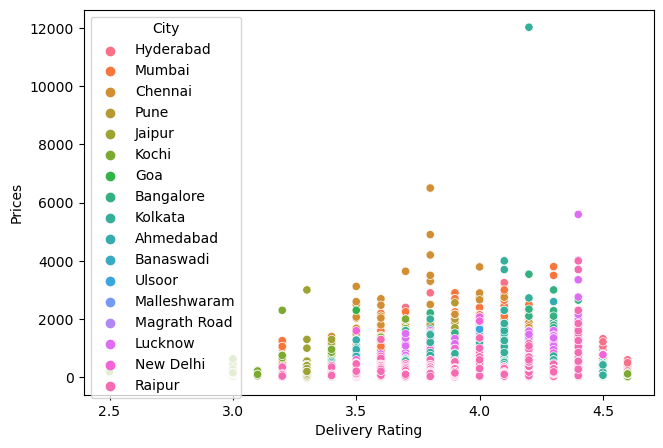

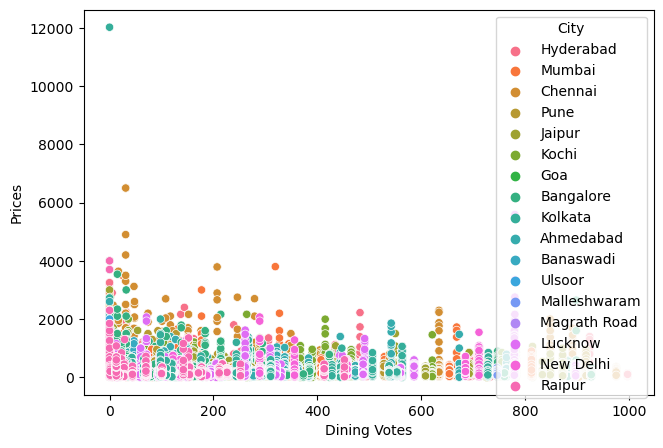

In [45]:
scat("Dining Rating",1)
scat("Delivery Rating",2)
scat("Dining Votes",3)

In [46]:
def scat_1(col,i):
    plt.figure(figsize=(25,5))
    plt.subplot(1,3,i)
    sns.scatterplot(data=df,x=col,y="Prices",hue="Special mentions")
    plt.show()

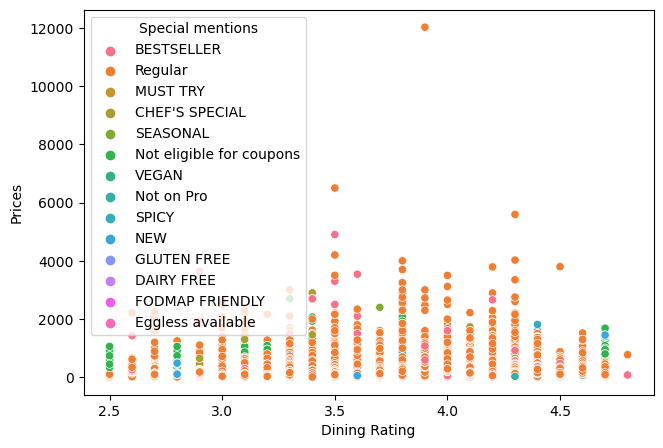

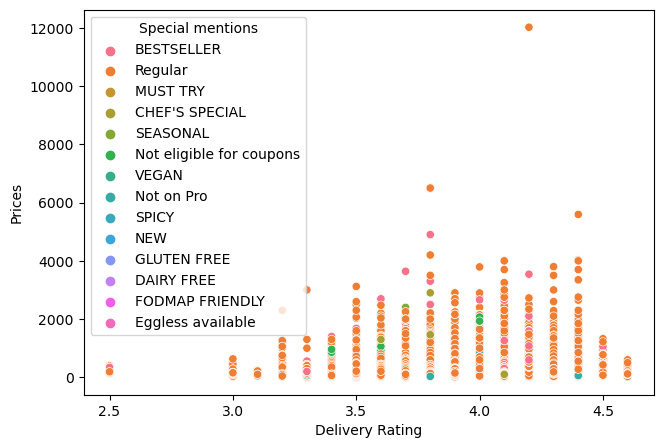

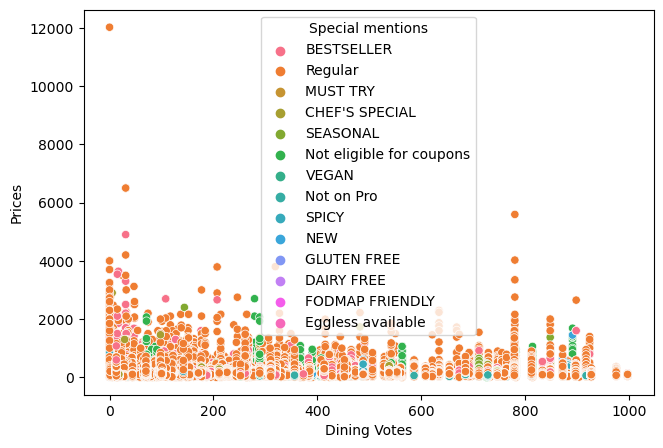

In [47]:
scat_1("Dining Rating",1)
scat_1("Delivery Rating",2)
scat_1("Dining Votes",3)

we can easily interpret that the special mentions "Best Seller" sold the most with higher rates.

In [48]:
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [50]:
fc=sweetviz.FeatureConfig(force_cat="Prices")

In [52]:
myreport=sweetviz.analyze(df,None,fc)

C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |                                             | [  0%]   00:00 ->…

C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_text.py:19: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in to_process.source_counts["value_counts_without_nan"].iteritems():
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
C:\Users\SURIYA\AppData\Local\anaconda3\lib\site-packages\sweetviz\series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and wil

In [53]:
myreport.show_html("Zomato_Analysis.html")

Report Zomato_Analysis.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [191]:
df.to_csv("zomato_dataset_refined.csv")